In [1]:
#1. Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2. Create handle to connect Python with Excel
handle_excel = pd.ExcelFile('TestPython.xlsx')
data = handle_excel.parse('InputData')
data

,Year_month,Y6M,Manager,Director,Division,Revenue,Asset,Level_number,Staff_quantity
0,202301,T1&2,Trưởng phòng 1,Giám đốc A,Corporate,10,12,27,6
1,202301,T1&2,Trưởng phòng 1,Giám đốc A,Corporate,3,10,24,2
2,202301,T1&2,Trưởng phòng 1,Giám đốc A,Corporate,9,11,25,5
3,202301,T1&2,Trưởng phòng 2,Giám đốc A,Corporate,10,17,23,5
4,202301,T1&2,Trưởng phòng 2,Giám đốc A,Corporate,7,20,25,2
...,...,...,...,...,...,...,...,...,...
71,204304,T3&4,Trưởng phòng 5,Giám đốc C,Private,1,14,28,6
72,204304,T3&4,Trưởng phòng 6,Giám đốc C,Private,10,17,24,2
73,204304,T3&4,Trưởng phòng 6,Giám đốc C,Private,7,18,22,4
74,204304,T3&4,Trưởng phòng 6,Giám đốc C,Private,8,13,22,4


In [3]:
#2.1 Fix Errors in data 
data['Year_month'] = pd.Series(str(month).replace("204304","202304").replace("203303", "202303") for month in data['Year_month'])
data[data['Year_month'] == "202303"]

,Year_month,Y6M,Manager,Director,Division,Revenue,Asset,Level_number,Staff_quantity
38,202303,T3&4,Trưởng phòng 1,Giám đốc A,Corporate,2,20,21,2
39,202303,T3&4,Trưởng phòng 1,Giám đốc A,Corporate,4,18,29,6
40,202303,T3&4,Trưởng phòng 1,Giám đốc A,Corporate,10,12,25,4
41,202303,T3&4,Trưởng phòng 2,Giám đốc A,Corporate,8,14,29,3
42,202303,T3&4,Trưởng phòng 2,Giám đốc A,Corporate,2,16,24,2
43,202303,T3&4,Trưởng phòng 2,Giám đốc A,Corporate,3,15,22,4
44,202303,T3&4,Trưởng phòng 3,Giám đốc B,Corporate,9,19,24,3
45,202303,T3&4,Trưởng phòng 3,Giám đốc B,Corporate,7,15,23,5
46,202303,T3&4,Trưởng phòng 3,Giám đốc B,Corporate,2,20,21,2
47,202303,T3&4,Trưởng phòng 4,Giám đốc B,Corporate,8,15,27,4


In [6]:
#3. CORPORATE DIVISION
#3.1 Filter Corporate Division
corperate_data = data[data['Division'] == 'Corporate']
corperate_data.head(5)

,Year_month,Y6M,Manager,Director,Division,Revenue,Asset,Level_number,Staff_quantity
0,202301,T1&2,Trưởng phòng 1,Giám đốc A,Corporate,10,12,27,6
1,202301,T1&2,Trưởng phòng 1,Giám đốc A,Corporate,3,10,24,2
2,202301,T1&2,Trưởng phòng 1,Giám đốc A,Corporate,9,11,25,5
3,202301,T1&2,Trưởng phòng 2,Giám đốc A,Corporate,10,17,23,5
4,202301,T1&2,Trưởng phòng 2,Giám đốc A,Corporate,7,20,25,2


In [72]:
#3.2 Create Pivot Table
table =pd.pivot_table(corperate_data, values =['Revenue', 'Asset', 'Level_number', 'Staff_quantity'], index =['Director', 'Manager'], 
                         columns =['Y6M'], aggfunc = np.sum)
table

Asset      Level_number      Revenue       \
Y6M                        T1&2 T3&4         T1&2 T3&4    T1&2 T3&4   
Director   Manager                                                    
Giám đốc A Trưởng phòng 1    78   97          145  154      46   35   
           Trưởng phòng 2   109   91          150  146      43   25   
Giám đốc B Trưởng phòng 3    44   65           68   97      18   19   
           Trưởng phòng 4    43   43           83   73      15   17   

                          Staff_quantity       
Y6M                                 T1&2 T3&4  
Director   Manager                             
Giám đốc A Trưởng phòng 1             26   25  
           Trưởng phòng 2             20   18  
Giám đốc B Trưởng phòng 3             13   11  
           Trưởng phòng 4             12   13

In [152]:
#3.3 Create Subtotal for Director and Corporate 
data_1 = pd.concat([
    y.append(y.sum().rename((x, ('Total of ' +x ))))
    for x, y in table.groupby(level=0)
]).append(table.sum().rename(('Corporate', 'Total')))
data_1

C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\3903823820.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y.append(y.sum().rename((x, ('Total of ' +x ))))
C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\3903823820.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y.append(y.sum().rename((x, ('Total of ' +x ))))
C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\3903823820.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ]).append(table.sum().rename(('Corporate', 'Total')))


Asset      Level_number      Revenue       \
Y6M                             T1&2 T3&4         T1&2 T3&4    T1&2 T3&4   
Director   Manager                                                         
Giám đốc A Trưởng phòng 1         78   97          145  154      46   35   
           Trưởng phòng 2        109   91          150  146      43   25   
           Total of Giám đốc A   187  188          295  300      89   60   
Giám đốc B Trưởng phòng 3         44   65           68   97      18   19   
           Trưởng phòng 4         43   43           83   73      15   17   
           Total of Giám đốc B    87  108          151  170      33   36   
Corporate  Total                 274  296          446  470     122   96   

                               Staff_quantity       
Y6M                                      T1&2 T3&4  
Director   Manager                                  
Giám đốc A Trưởng phòng 1                  26   25  
           Trưởng phòng 2                  20   18  
           Total of Giám đốc A             46   43  
Giám đốc B Trưởng phòng 3                  13   11  
           Trưởng phòng 4                  12   13  
           Total of Giám đốc B             25   24  
Corporate  Total                           71   67

In [75]:
#4. PRIVATE DIVISION
private_data = data[data['Division'] == 'Private']
table_2 = pd.pivot_table(private_data, values =['Revenue', 'Asset', 'Level_number', 'Staff_quantity'], index =['Director', 'Manager'], 
                         columns =['Y6M'], aggfunc = np.sum)
table_2

Asset      Level_number      Revenue       \
Y6M                        T1&2 T3&4         T1&2 T3&4    T1&2 T3&4   
Director   Manager                                                    
Giám đốc B Trưởng phòng 3    46   33           73   51      11    2   
           Trưởng phòng 4    42   48           73   75      27    7   
Giám đốc C Trưởng phòng 5    84   80          151  161      34   31   
           Trưởng phòng 6   107  121          192  205      36   53   

                          Staff_quantity       
Y6M                                 T1&2 T3&4  
Director   Manager                             
Giám đốc B Trưởng phòng 3             11    7  
           Trưởng phòng 4              5   14  
Giám đốc C Trưởng phòng 5             21   23  
           Trưởng phòng 6             31   28

In [153]:
#4.1 Create Subtotal for Director and Private, then take the final row as Private Total
data_2 = pd.concat([
    y.append(y.sum().rename((x, ('Total of ' +x ))))
    for x, y in table_2.groupby(level=0)
]).append(table_2.sum().rename(('Private', 'Total')))
data_2.iloc[[-1]]

C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\187263933.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y.append(y.sum().rename((x, ('Total of ' +x ))))
C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\187263933.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y.append(y.sum().rename((x, ('Total of ' +x ))))
C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\187263933.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ]).append(table_2.sum().rename(('Private', 'Total')))


Asset      Level_number      Revenue      Staff_quantity     
Y6M               T1&2 T3&4         T1&2 T3&4    T1&2 T3&4           T1&2 T3&4
Director Manager                                                              
Private  Total     279  282          489  492     108   93             68   72

In [235]:
#4.2 Get the Final Pivot Result of CORPORATE
df_corporate = data_1.append(data_2.iloc[[-1]])
df_corporate

C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\970571591.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corporate = data_1.append(data_2.iloc[[-1]])


Asset      Level_number      Revenue       \
Y6M                             T1&2 T3&4         T1&2 T3&4    T1&2 T3&4   
Director   Manager                                                         
Giám đốc A Trưởng phòng 1         78   97          145  154      46   35   
           Trưởng phòng 2        109   91          150  146      43   25   
           Total of Giám đốc A   187  188          295  300      89   60   
Giám đốc B Trưởng phòng 3         44   65           68   97      18   19   
           Trưởng phòng 4         43   43           83   73      15   17   
           Total of Giám đốc B    87  108          151  170      33   36   
Corporate  Total                 274  296          446  470     122   96   
Private    Total                 279  282          489  492     108   93   

                               Staff_quantity       
Y6M                                      T1&2 T3&4  
Director   Manager                                  
Giám đốc A Trưởng phòng 1                  26   25  
           Trưởng phòng 2                  20   18  
           Total of Giám đốc A             46   43  
Giám đốc B Trưởng phòng 3                  13   11  
           Trưởng phòng 4                  12   13  
           Total of Giám đốc B             25   24  
Corporate  Total                           71   67  
Private    Total                           68   72

In [233]:
#4.3 Get the Final Pivot Result of PRIVATE
df_private = data_2.append(data_1.iloc[[-1]])
df_private

C:\Users\vagy1255\AppData\Local\Temp\ipykernel_10188\2103535036.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_private = data_2.append(data_1.iloc[[-1]])


Asset      Level_number      Revenue       \
Y6M                             T1&2 T3&4         T1&2 T3&4    T1&2 T3&4   
Director   Manager                                                         
Giám đốc B Trưởng phòng 3         46   33           73   51      11    2   
           Trưởng phòng 4         42   48           73   75      27    7   
           Total of Giám đốc B    88   81          146  126      38    9   
Giám đốc C Trưởng phòng 5         84   80          151  161      34   31   
           Trưởng phòng 6        107  121          192  205      36   53   
           Total of Giám đốc C   191  201          343  366      70   84   
Private    Total                 279  282          489  492     108   93   
Corporate  Total                 274  296          446  470     122   96   

                               Staff_quantity       
Y6M                                      T1&2 T3&4  
Director   Manager                                  
Giám đốc B Trưởng phòng 3                  11    7  
           Trưởng phòng 4                   5   14  
           Total of Giám đốc B             16   21  
Giám đốc C Trưởng phòng 5                  21   23  
           Trưởng phòng 6                  31   28  
           Total of Giám đốc C             52   51  
Private    Total                           68   72  
Corporate  Total                           71   67

In [221]:
#4.3 Get the column names of the Final Pivot Table 
columns = list(set([item[0] for item in df_corporate.columns]))
columns

['Staff_quantity', 'Asset', 'Revenue', 'Level_number']

In [193]:
# OTHER DATA WRANGLINGS STEPS
df_corporate['Asset'] #type: pandas.core.frame.DataFrame
df_corporate['Asset'][['T3&4']] #pandas.core.frame.DataFrame
df_corporate['Asset'][['T3&4']]['T3&4'] #pandas.core.series.Series

Director    Manager            
Giám đốc A  Trưởng phòng 1          97
            Trưởng phòng 2          91
            Total of Giám đốc A    188
Giám đốc B  Trưởng phòng 3          65
            Trưởng phòng 4          43
            Total of Giám đốc B    108
Corporate   Total                  296
Private     Total                  282
Name: T3&4, dtype: int64

In [162]:
df_corporate['Asset'].iloc[1][0]

109

In [201]:
df_corporate['Asset Tăng/Giảm (%)'] = round((df_corporate['Asset'][['T3&4']]['T3&4'] - df_corporate['Asset'][['T1&2']]['T1&2']) / df_corporate['Asset'][['T1&2']]['T1&2'], 2) * 100
df_corporate

Asset      Level_number      Revenue       \
Y6M                             T1&2 T3&4         T1&2 T3&4    T1&2 T3&4   
Director   Manager                                                         
Giám đốc A Trưởng phòng 1         78   97          145  154      46   35   
           Trưởng phòng 2        109   91          150  146      43   25   
           Total of Giám đốc A   187  188          295  300      89   60   
Giám đốc B Trưởng phòng 3         44   65           68   97      18   19   
           Trưởng phòng 4         43   43           83   73      15   17   
           Total of Giám đốc B    87  108          151  170      33   36   
Corporate  Total                 274  296          446  470     122   96   
Private    Total                 279  282          489  492     108   93   

                               Staff_quantity      Asset Tăng/Giảm (%)  
Y6M                                      T1&2 T3&4                      
Director   Manager                                                      
Giám đốc A Trưởng phòng 1                  26   25                24.0  
           Trưởng phòng 2                  20   18               -17.0  
           Total of Giám đốc A             46   43                 1.0  
Giám đốc B Trưởng phòng 3                  13   11                48.0  
           Trưởng phòng 4                  12   13                 0.0  
           Total of Giám đốc B             25   24                24.0  
Corporate  Total                           71   67                 8.0  
Private    Total                           68   72                 1.0

In [236]:
#5 FINAL RESULT OF CORPORATE DIVISION
for column in columns:
    df_corporate[column + ' tăng/giảm (%)'] = round((df_corporate[column][['T3&4']]['T3&4'] - df_corporate[column][['T1&2']]['T1&2']) / df_corporate[column][['T1&2']]['T1&2'], 2) * 100 
df_corporate.reindex(sorted(df_corporate.columns), axis=1)

Asset      Asset tăng/giảm (%) Level_number  \
Y6M                             T1&2 T3&4                             T1&2   
Director   Manager                                                           
Giám đốc A Trưởng phòng 1         78   97                24.0          145   
           Trưởng phòng 2        109   91               -17.0          150   
           Total of Giám đốc A   187  188                 1.0          295   
Giám đốc B Trưởng phòng 3         44   65                48.0           68   
           Trưởng phòng 4         43   43                 0.0           83   
           Total of Giám đốc B    87  108                24.0          151   
Corporate  Total                 274  296                 8.0          446   
Private    Total                 279  282                 1.0          489   

                                    Level_number tăng/giảm (%) Revenue       \
Y6M                            T3&4                               T1&2 T3&4   
Director   Manager                                                            
Giám đốc A Trưởng phòng 1       154                        6.0      46   35   
           Trưởng phòng 2       146                       -3.0      43   25   
           Total of Giám đốc A  300                        2.0      89   60   
Giám đốc B Trưởng phòng 3        97                       43.0      18   19   
           Trưởng phòng 4        73                      -12.0      15   17   
           Total of Giám đốc B  170                       13.0      33   36   
Corporate  Total                470                        5.0     122   96   
Private    Total                492                        1.0     108   93   

                               Revenue tăng/giảm (%) Staff_quantity       \
Y6M                                                            T1&2 T3&4   
Director   Manager                                                         
Giám đốc A Trưởng phòng 1                      -24.0             26   25   
           Trưởng phòng 2                      -42.0             20   18   
           Total of Giám đốc A                 -33.0             46   43   
Giám đốc B Trưởng phòng 3                        6.0             13   11   
           Trưởng phòng 4                       13.0             12   13   
           Total of Giám đốc B                   9.0             25   24   
Corporate  Total                               -21.0             71   67   
Private    Total                               -14.0             68   72   

                               Staff_quantity tăng/giảm (%)  
Y6M                                                          
Director   Manager                                           
Giám đốc A Trưởng phòng 1                              -4.0  
           Trưởng phòng 2                             -10.0  
           Total of Giám đốc A                         -7.0  
Giám đốc B Trưởng phòng 3                             -15.0  
           Trưởng phòng 4                               8.0  
           Total of Giám đốc B                         -4.0  
Corporate  Total                                       -6.0  
Private    Total                                        6.0

In [237]:
#6 FINAL RESULT OF PRIVATE DIVISION
for column in columns:
    df_private[column + ' tăng/giảm (%)'] = round((df_private[column][['T3&4']]['T3&4'] - df_private[column][['T1&2']]['T1&2']) / df_private[column][['T1&2']]['T1&2'], 2) * 100 
df_private.reindex(sorted(df_corporate.columns), axis=1)

Asset      Asset tăng/giảm (%) Level_number  \
Y6M                             T1&2 T3&4                             T1&2   
Director   Manager                                                           
Giám đốc B Trưởng phòng 3         46   33               -28.0           73   
           Trưởng phòng 4         42   48                14.0           73   
           Total of Giám đốc B    88   81                -8.0          146   
Giám đốc C Trưởng phòng 5         84   80                -5.0          151   
           Trưởng phòng 6        107  121                13.0          192   
           Total of Giám đốc C   191  201                 5.0          343   
Private    Total                 279  282                 1.0          489   
Corporate  Total                 274  296                 8.0          446   

                                    Level_number tăng/giảm (%) Revenue       \
Y6M                            T3&4                               T1&2 T3&4   
Director   Manager                                                            
Giám đốc B Trưởng phòng 3        51                      -30.0      11    2   
           Trưởng phòng 4        75                        3.0      27    7   
           Total of Giám đốc B  126                      -14.0      38    9   
Giám đốc C Trưởng phòng 5       161                        7.0      34   31   
           Trưởng phòng 6       205                        7.0      36   53   
           Total of Giám đốc C  366                        7.0      70   84   
Private    Total                492                        1.0     108   93   
Corporate  Total                470                        5.0     122   96   

                               Revenue tăng/giảm (%) Staff_quantity       \
Y6M                                                            T1&2 T3&4   
Director   Manager                                                         
Giám đốc B Trưởng phòng 3                      -82.0             11    7   
           Trưởng phòng 4                      -74.0              5   14   
           Total of Giám đốc B                 -76.0             16   21   
Giám đốc C Trưởng phòng 5                       -9.0             21   23   
           Trưởng phòng 6                       47.0             31   28   
           Total of Giám đốc C                  20.0             52   51   
Private    Total                               -14.0             68   72   
Corporate  Total                               -21.0             71   67   

                               Staff_quantity tăng/giảm (%)  
Y6M                                                          
Director   Manager                                           
Giám đốc B Trưởng phòng 3                             -36.0  
           Trưởng phòng 4                             180.0  
           Total of Giám đốc B                         31.0  
Giám đốc C Trưởng phòng 5                              10.0  
           Trưởng phòng 6                             -10.0  
           Total of Giám đốc C                         -2.0  
Private    Total                                        6.0  
Corporate  Total                                       -6.0

In [5]:
df_chart = data[['Year_month', 'Manager', 'Revenue']]
df_chart_pivot = pd.pivot_table(df_chart, values =['Revenue'], index =['Year_month'], 
                         columns =['Manager'], aggfunc = np.sum)
df_chart_pivot

Revenue                                               \
Manager    Trưởng phòng 1 Trưởng phòng 2 Trưởng phòng 3 Trưởng phòng 4   
Year_month                                                               
202301                 22             22             11             27   
202302                 24             21             18             15   
202303                 16             13             18             17   
202304                 19             12              3              7   

                                          
Manager    Trưởng phòng 5 Trưởng phòng 6  
Year_month                                
202301                 19             13  
202302                 15             23  
202303                 15             18  
202304                 16             35

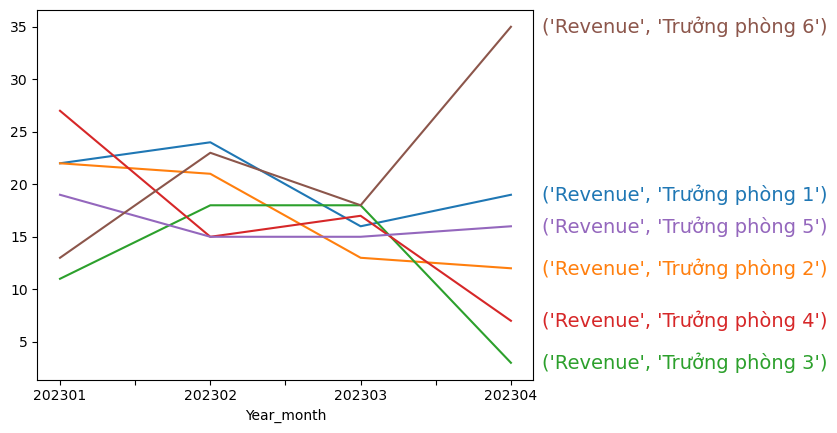

In [22]:
ax = df_chart_pivot['Revenue'].plot()

# zip joins x and y coordinates in pairs
for line, name in zip(ax.lines, df_chart_pivot.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")
ax.get_legend().remove()


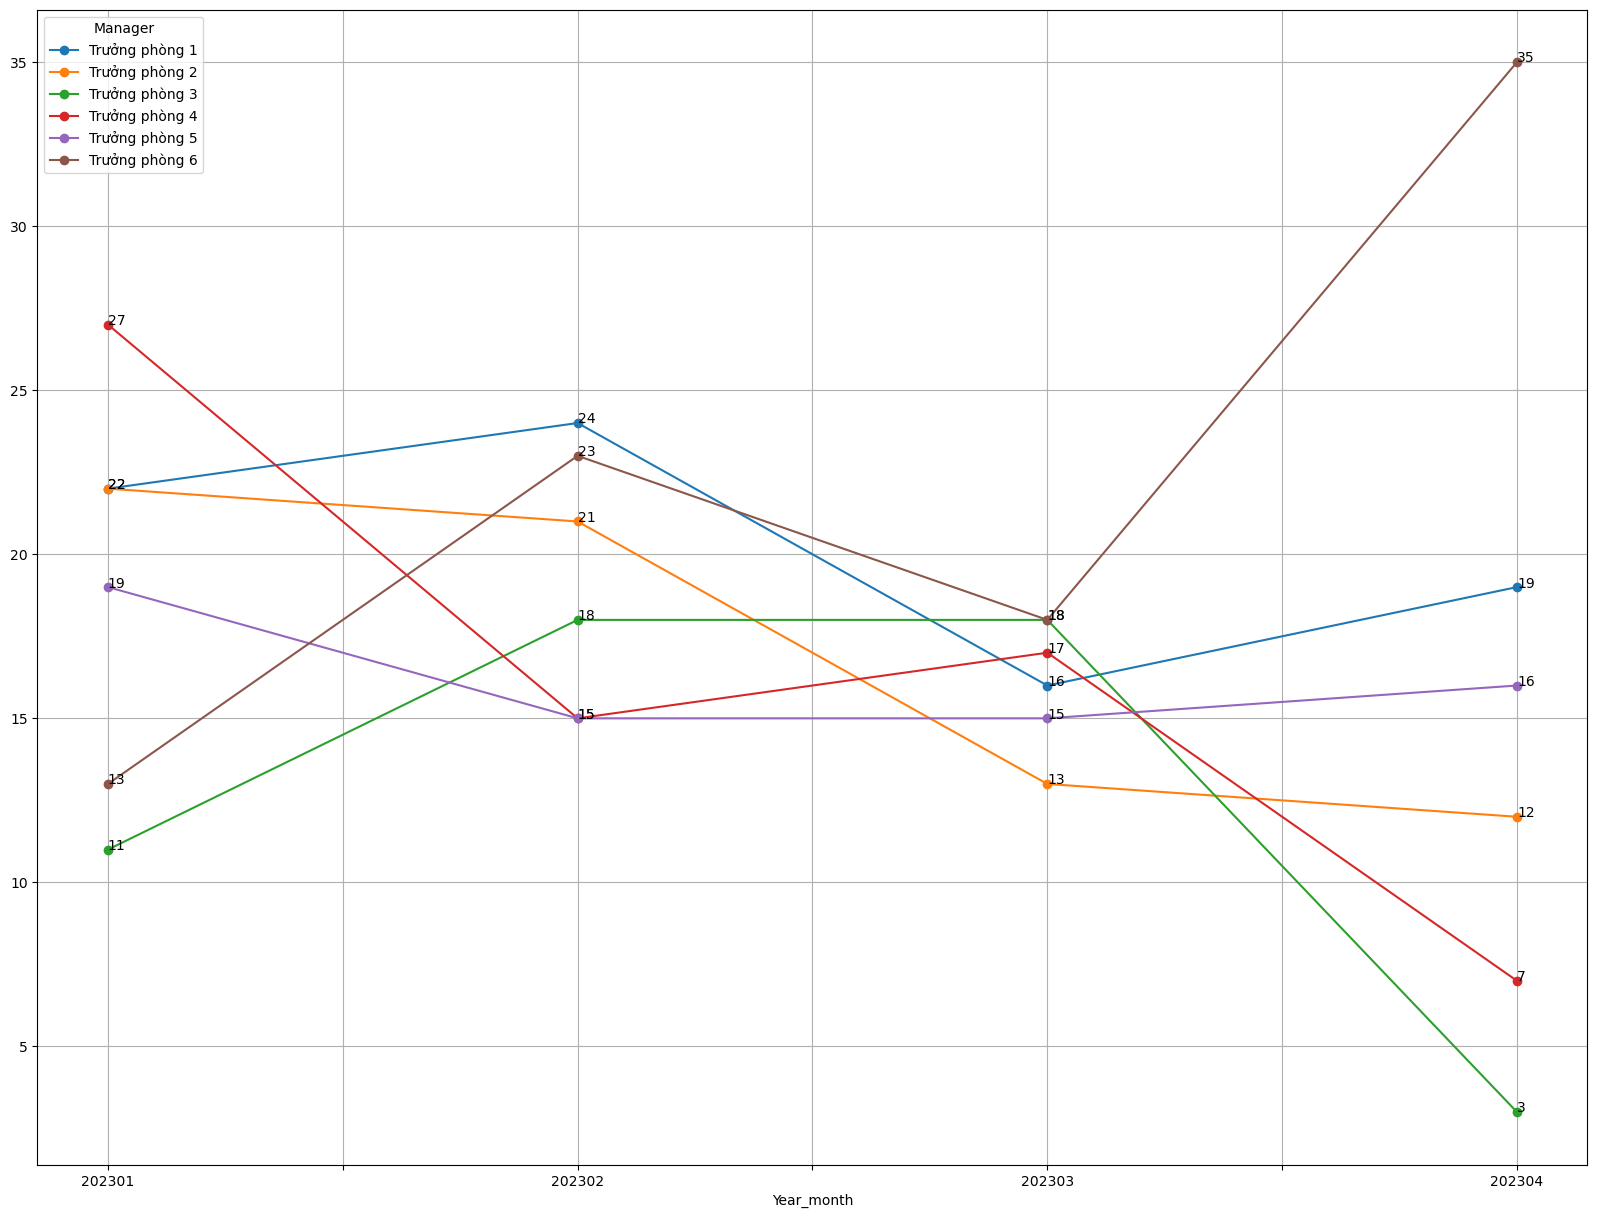

In [66]:


plot_df = df_chart_pivot['Revenue']  
ax = plot_df.plot(grid=True, figsize=(20, 15), marker='o')
#Show data value here
for col in plot_df.columns:  
    for idx, val in enumerate(plot_df[col]):
       ax.text(idx, val, str(val), ma = 'right')
       